In [3]:
import pickle

from station_hr_day_zipgatereg import *
from src.inference import *
from src.criticism import *

In [3]:
with open('/Users/nihaar/Documents/Fall19/ML_Probabilistic_Programming_Columbia/code/data/small_train_final_colab.pkl', 'rb') as f:
    data_samp = pickle.load(f)

In [6]:
train = data_samp
data, features = feature_generation(train)
p = ZIPoissRegGate(features, data)


In [7]:
svi_posterior = get_svi_posterior(data['data'], data['demand'],
                                model = p.model,
                                  guide = p.guide,
                                  filename='/Users/nihaar/Documents/Fall19/ML_Probabilistic_Programming_Columbia/code/probprog-finalproject/models/svi_zip_params_station_plus_hr_day.pkl')

In [10]:
print(svi_posterior.information_criterion())

OrderedDict([('waic', tensor(5332.7437, grad_fn=<SumBackward0>)), ('p_waic', tensor(414.1696, grad_fn=<SumBackward0>))])


In [11]:
post_samples = posterior_samples(
    p.wrapped_model,
    svi_posterior,
    data,
    ['obs'],
    num_samples=10)

In [18]:
pss=post_samples.squeeze()

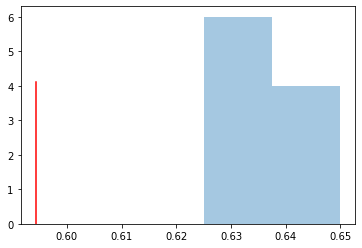

In [12]:
compare_test_statistic(data_samp.demand.values, post_samples[:,0,:],
                       stat=perc_0)

In [26]:
pss[0,:].shape
data_samp.demand.values.shape

(2014,)

TypeError: len() of unsized object

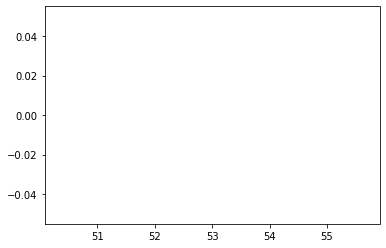